In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data file
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

Perform some exploratory data analysis to familiarize ourselves with the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
# Use additional dataset that describes the meaning of each feature

descriptions = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

def feat_desc(column_name): 
    print(descriptions.loc[column_name]['Description'])

feat_desc('mort_acc') #or any other column name

Number of mortgage accounts.


<AxesSubplot:xlabel='loan_status', ylabel='count'>

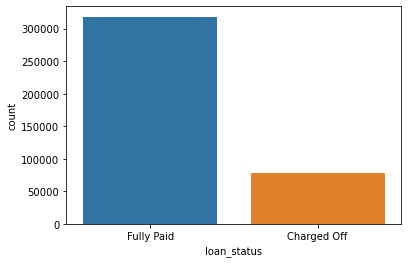

In [6]:
# Count plot for both outcomes we are trying to predict. 
sns.countplot(x=df['loan_status'])

Seems that our data on Charged Off cases are way less than the Fully Paid ones. This an inbalanced problem. Lot's of entries for one of the two clusters that we are trying to predict. Therefore we expect to do well in accuracy, but the precision and recall will be the true metrics to evaluate our model on.

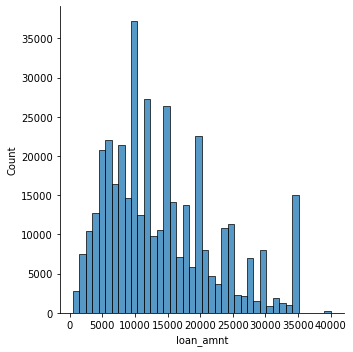

In [7]:
sns.displot(df['loan_amnt'],kde=False,bins=40)
# or sns.histplot(df['loan_amnt'],kde=False,bins=40)

In [8]:
# Let's explore the correlation between the continuous feature variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

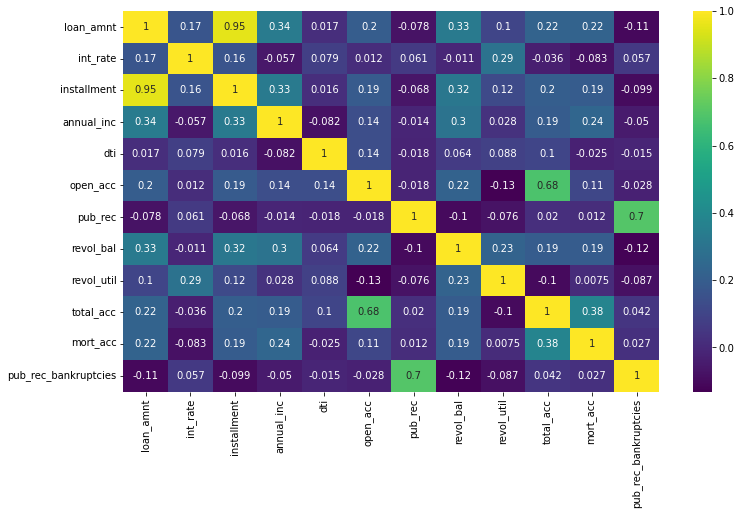

In [9]:
# And visualiing it
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [10]:
# We notice a clear correlation between the loan amount and the "installment" feature. 
feat_desc('installment')

The monthly payment owed by the borrower if the loan originates.


In [11]:
# Probably the lenting company uses some sort of formula that uses the loan amount to determine the installment. 
feat_desc('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

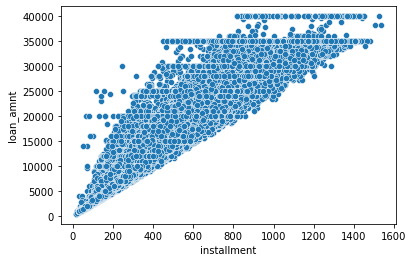

In [12]:
# Let's visualize that correlation. 
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

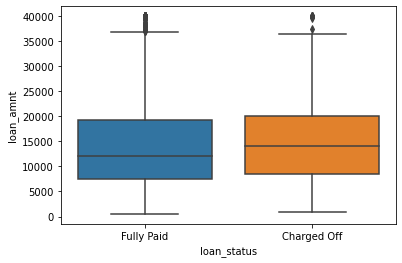

In [13]:
# It seems like the behavior is rather similar, so the loan_amnt is not a great indicator whether someone will pay off the loan. 
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [14]:
# To observe that relationship better, we can calculate the statistics for loan amount grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The average of the people that did not pay back is slightly higher that the ones that did. 

In [15]:
# Let's find out what the unique values of the grade and sub_grade features are
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [16]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [17]:
feat_desc('sub_grade')

LC assigned loan subgrade


<AxesSubplot:xlabel='grade', ylabel='count'>

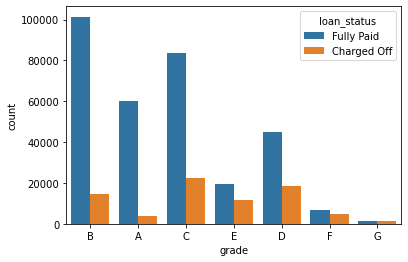

In [18]:
# Let's see whether there is any grade with a particular behavior. 
sns.countplot(x='grade',data=df,hue='loan_status')

Seems that clients in grade A are less likely to be Charged Off, followed by the ones in B, then C etc. 

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

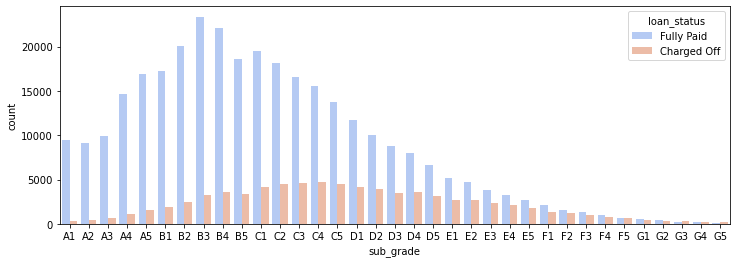

In [19]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

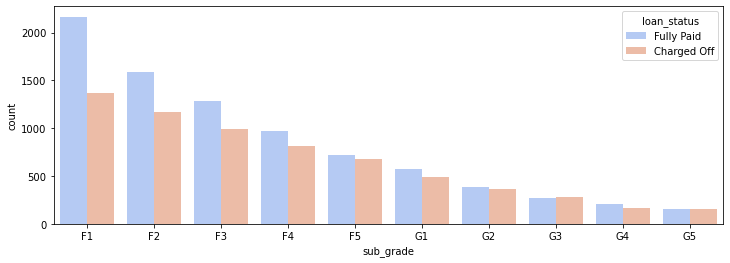

In [20]:
# We previously saw that grades F and G don't get paid back that often.
# Let's isolate them and create the countplot again. 
f_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_g,order=subgrade_order,palette='coolwarm',hue='loan_status')

In [21]:
# Let's turn our dependent variable to binary form. 
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [22]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

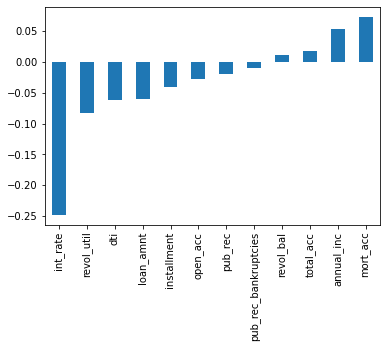

In [23]:
# Now we want to see which numeric features have the highest correlation with the actual label. 
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

The interest rate has the highest correlation to whether someone will repay their loan or not.

We'll continue this project with some data PreProcessing

In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [25]:
# Length of our dataset.
len(df)

396030

In [26]:
# How many data points are we missing. 
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
# How significant are those missing values percentage wise
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

It seems that there are some features (title, revol_util, pub_rec_bakruptcies) with really tivial percentage of missing data. 
Those missing values can simply be dropped. 
Will do that later on. 

In [28]:
feat_desc('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [29]:
feat_desc('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [30]:
# How many employment titles do we have
df['emp_title'].nunique()

173105

In [31]:
# Around half of the employment titles are unique in our dataset. 
df['emp_title'].nunique()/len(df)*100

43.710072469257376

In [32]:
# Let's observe some of them
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [33]:
# Since we have so many different titles, this feature will realistically not be that useful to us.
# Thus, we'll drop the entire column. 
df = df.drop('emp_title',axis=1)

In [34]:
# Define a function to convert the string format of emp_length to integer
def get_years(years):
    if len(years)==7 or len(years)==6: # input between 1-9 years
        return int(years[0])
    elif len(years)==8: # input '< 1 year'
        return 0
    elif len(years)==9: # input '10+ years'
        return int(years[:2])

In [35]:
df['emp_len'] = df['emp_length'].dropna().apply(get_years)

In [36]:
df['emp_len'].unique()

array([10.,  4.,  0.,  6.,  9.,  2.,  3.,  8.,  7.,  5.,  1., nan])

<AxesSubplot:xlabel='emp_len', ylabel='count'>

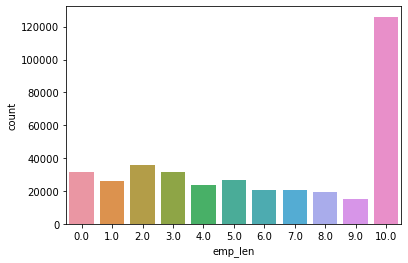

In [37]:
# Seems like most of the people with loan application have worked more than 10 years. 
sns.countplot(x=df['emp_len'])

<AxesSubplot:xlabel='emp_len', ylabel='count'>

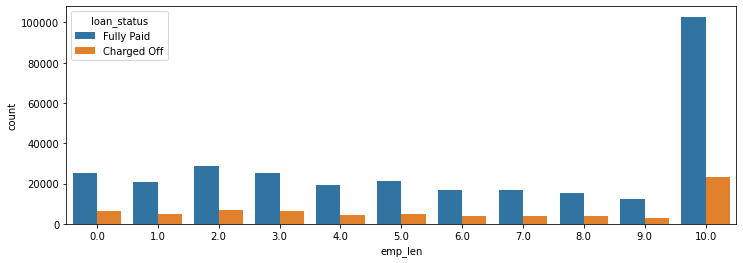

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_len',data=df,hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment length category didn't pay back their loan.

In [39]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_len').count()['loan_status']

In [40]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_len').count()['loan_status']

In [41]:
# Percent of people that charged off vs the ones who fully paid.
emp_per = emp_co/(emp_co+emp_fp)

The ratios look quite similar. So this particular feature emp_len doesn't have any significant difference with respect to the loan status. We can notice though that people with +10 years of employment have slightly less chances of being Charged Off. 

<AxesSubplot:xlabel='emp_len'>

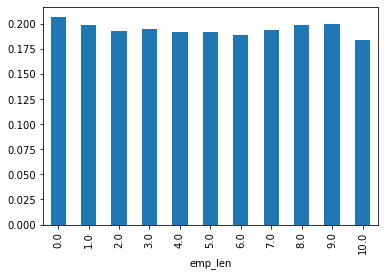

In [42]:
emp_per.plot(kind='bar')

In [43]:
# Therefore we can conclude that the column can be dropped without major impact. 
df = df.drop(['emp_length','emp_len'],axis=1)

In [44]:
# Let's see which feature columns still have missing data. 
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [45]:
# Check whether the title column is similar to the purpose column
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [46]:
feat_desc('purpose')

A category provided by the borrower for the loan request. 


In [47]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [48]:
feat_desc('title')

The loan title provided by the borrower


In [49]:
# The title column is simply a string subcategory/description of the purpose column.
df = df.drop('title',axis=1)

Now let's focus on the mort_acc feature. 

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

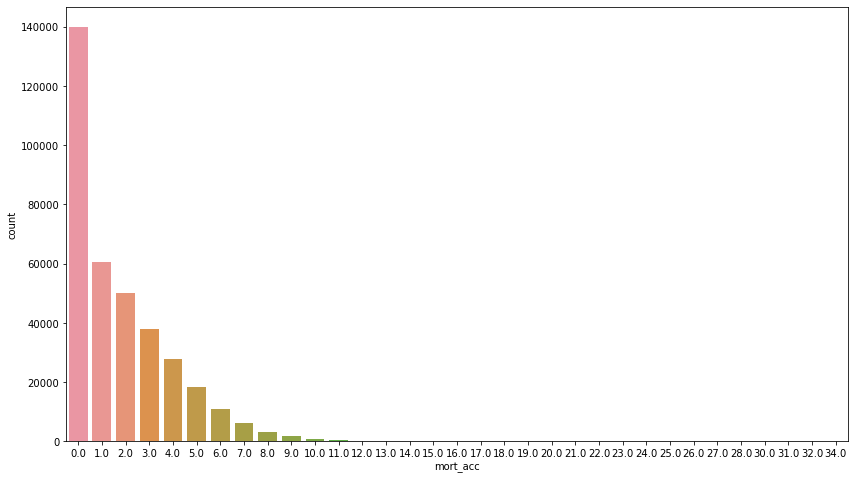

In [50]:
# We observe that around half or our data points have mort_acc equal to 0
plt.figure(figsize=(14,8))
sns.countplot(x=df['mort_acc'])

<AxesSubplot:>

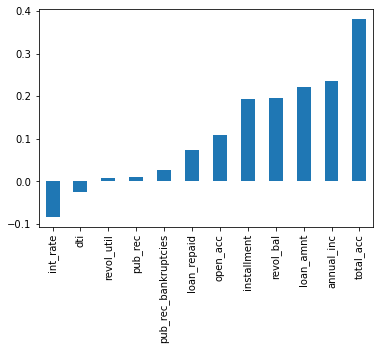

In [51]:
# Let's try to identify the features most correlated with mort_acc
df.corr()['mort_acc'].sort_values()[:-1].plot(kind='bar')

Seems that the total_acc correlates with the mort_acc feature, so can be useful. 

In [52]:
# Group the df by the total_acc and calculate the mean value for the mort_acc per total_acc entry.
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

We'll fill in the missing mort_acc values based on the means of each total_acc group. 

In [53]:
# Build a function to apply to our df. 
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [54]:
# Apply the function
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [55]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [56]:
# Let's drop the rest of the missing values
df = df.dropna()

In [57]:
# No more missing data
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

Now let's work with the categorical and Dummy variables

In [58]:
# Only string columns
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [59]:
feat_desc('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [60]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [61]:
# We'll grab only the number of the data points as int
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [62]:
# grade and sub_grade carry essentially the same pieces of information.
df = df.drop('grade',axis=1)

In [63]:
# Now we can converst the sub_grade data into dummy variables. 
# drop_first=True to prevent us from encoding duplicate information. 
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [64]:
#df.columns

In [65]:
df[['home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address']].nunique()

home_ownership              6
verification_status         3
issue_d                   112
loan_status                 2
purpose                    14
earliest_cr_line          684
initial_list_status         2
application_type            3
address                392898
dtype: int64

It seems that verification_status, purpose, initial_list_status and application_type have fairly low number of unique values, so we'll convert them in dummy variables as well. 

In [66]:
dummies = pd.get_dummies(df[['verification_status','purpose','initial_list_status','application_type']],drop_first=True)

df = pd.concat([df.drop(['verification_status','purpose','initial_list_status','application_type'],axis=1),dummies],axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_J

In [68]:
# Let's observe the values in the home_ownership column
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Seems that the NONE and ANY categories count for just a tiny number of entries. 
Because there are so few people, we'll move the numbers of these categories to the OTHER, to reduce the number of the feature columns. 

In [69]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [70]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [71]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [72]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [73]:
# We notice that the address contains the zop code at the end, so let's grab that. 
df['zip_code'] = df['address'].apply(lambda a: a[-5:])

In [74]:
# We have 10 unique zip codes. 
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [75]:
# Let's create dummy vatiables out of them
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [76]:
df = df.drop('address',axis=1)

In [77]:
# Let's deal with issue_d
feat_desc('issue_d')

The month which the loan was funded


This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. Therefor, we'll drop this feature.

In [78]:
df = df.drop('issue_d',axis=1)

In [79]:
# Last one is the earliest_cr_line
feat_desc('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [80]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [81]:
# Let's use the year of those data points
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [82]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

No need to convert this feature column to dummy variables since the year itself can be treated as a continuous data type. 

Train Test Split the data

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
# We'll drop loan_status and will use loan_repaid because it's already in 0 & 1's format. 
df = df.drop('loan_status',axis=1)

In [86]:
X = df.drop('loan_repaid',axis=1)
y = df['loan_repaid']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtree = DecisionTreeClassifier()

In [90]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
predictions = dtree.predict(X_test)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58     23363
           1       0.90      0.89      0.89     95203

    accuracy                           0.83    118566
   macro avg       0.73      0.74      0.74    118566
weighted avg       0.83      0.83      0.83    118566



In [94]:
# Percent of people who fully repaid their loan vs total number of data. 
df['loan_repaid'].value_counts()[1]/len(df)*100

80.38479931379817

We have an inbalanced database and the cases when the full loan was repaid represent 80% of our data. We see that the accuracy of our model is essentially 83%, which means that it will perform slightly better in predicting whether someone will repay the loan. 

Let's try a linear machine learning algorithm, the KNN. 

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [116]:
df = df.sample(frac=0.2,random_state=101)

In [117]:
scaler.fit(df.drop('loan_repaid',axis=1))

StandardScaler()

In [118]:
scaled_features = scaler.transform(df.drop('loan_repaid',axis=1))

In [119]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['loan_repaid'],
                                                    test_size=0.30)

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors=5)

In [122]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [123]:
pred = knn.predict(X_test)

In [124]:
print(confusion_matrix(y_test,pred))

[[ 15  28]
 [  6 188]]


In [125]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.35      0.47        43
           1       0.87      0.97      0.92       194

    accuracy                           0.86       237
   macro avg       0.79      0.66      0.69       237
weighted avg       0.84      0.86      0.84       237



By using KNN we managed to increase the accuracy to 86%, which is sort of good for the purpose of this project. With more feature engineering, we could potentially improve more the accuracy and either our precision or recall, depending on the risk or the approach we are willing to take, since approving or denying a loan to someone will have certain implication for both parties. 
In fact, the demands of each project, resourses and time will always influence our perceptin on what we consider sufficient as model performance. 

Pavlos Bosmalis